# Dynamic Pricing & Market analysis of Airbnb listings in Cape Town.

How can Airbnb hosts in Cape Town optimize their listing prices by understanding the key factors that influence pricing, while also predicting the price of a new listing based on its features?

1. Exploratory Analysis: Understanding what affects the price.
2. Predictive Modeling: Creating a pricing prediction system for hosts.
3. Actionable Insights: Helping hosts improve their listings based on data-driven findings.

# 1. Business Understanding

Objective: Determine how to optimize listing prices for Airbnb hosts in Cape Town and predict the price of new listings.
Key Questions:

What are the key features affecting listing prices?
Can we predict a price for a new listing based on its characteristics?

## 2. Data Understanding

In [2]:
# Import libraries
import pandas as pd

# Load the dataset
data = pd.read_csv("C:/Users/User/Desktop/VS/Github/listings.csv")

# Check the first few rows
print(data.head())

# Display summary information
print(data.info())

# Check for missing values
print(data.isnull().sum())

# Descriptive statistics
print(data.describe())


      id                         listing_url       scrape_id last_scraped  \
0   3191   https://www.airbnb.com/rooms/3191  20240925221841   2024-09-26   
1  15007  https://www.airbnb.com/rooms/15007  20240925221841   2024-09-26   
2  15068  https://www.airbnb.com/rooms/15068  20240925221841   2024-09-26   
3  15077  https://www.airbnb.com/rooms/15077  20240925221841   2024-09-26   
4  15199  https://www.airbnb.com/rooms/15199  20240925221841   2024-09-26   

            source                                             name  \
0      city scrape                          Malleson Garden Cottage   
1      city scrape  Blaauwberg House on the beach in Bloubergstrand   
2      city scrape                                       Grande Bay   
3      city scrape                Top relaxed beach living in style   
4  previous scrape                          Self catering apartment   

                                         description  \
0  This is a lovely, separate, self-catering cott...  

In [3]:
data.shape

(24389, 75)

In [4]:
# Visualize correlations (for numerical data)
import seaborn as sns
import matplotlib.pyplot as plt

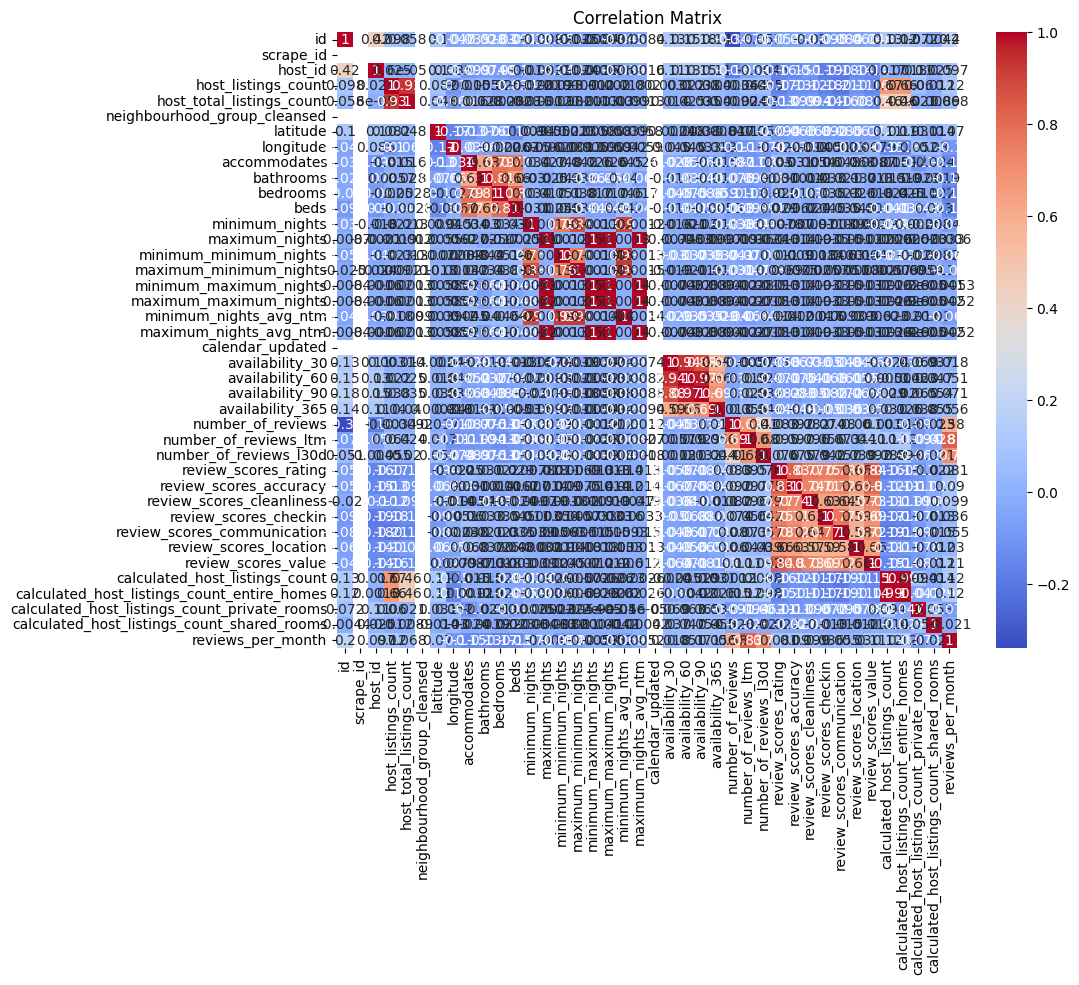

In [5]:
# Select only numeric columns for correlation analysis
data_numeric = data.select_dtypes(include=['number'])

# Plot the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(data_numeric.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [6]:
data.isnull().sum().sort_values(ascending=False)

neighbourhood_group_cleansed    24389
calendar_updated                24389
license                         24304
host_neighbourhood              24203
host_about                      11988
                                ...  
host_picture_url                    0
host_thumbnail_url                  0
neighbourhood_cleansed              0
availability_60                     0
id                                  0
Length: 75, dtype: int64

# 3. Data Preparation

In [7]:
columns_needed = [
    'price', 'latitude', 'longitude', 'property_type', 'room_type',
    'accommodates', 'bathrooms', 'bedrooms', 'beds', 'review_scores_rating', 'reviews_per_month',
    'number_of_reviews', 'availability_365','license','host_identity_verified',
    'instant_bookable','room_type','calculated_host_listings_count','minimum_nights',
    'neighbourhood','availability_365','number_of_reviews','reviews_per_month','latitude', 'longitude',
]
columns_needed

['price',
 'latitude',
 'longitude',
 'property_type',
 'room_type',
 'accommodates',
 'bathrooms',
 'bedrooms',
 'beds',
 'review_scores_rating',
 'reviews_per_month',
 'number_of_reviews',
 'availability_365',
 'license',
 'host_identity_verified',
 'instant_bookable',
 'room_type',
 'calculated_host_listings_count',
 'minimum_nights',
 'neighbourhood',
 'availability_365',
 'number_of_reviews',
 'reviews_per_month',
 'latitude',
 'longitude']

In [8]:
df = data[columns_needed]

In [9]:
df.columns

Index(['price', 'latitude', 'longitude', 'property_type', 'room_type',
       'accommodates', 'bathrooms', 'bedrooms', 'beds', 'review_scores_rating',
       'reviews_per_month', 'number_of_reviews', 'availability_365', 'license',
       'host_identity_verified', 'instant_bookable', 'room_type',
       'calculated_host_listings_count', 'minimum_nights', 'neighbourhood',
       'availability_365', 'number_of_reviews', 'reviews_per_month',
       'latitude', 'longitude'],
      dtype='object')

In [10]:
df.head()

,price,latitude,longitude,property_type,room_type,accommodates,bathrooms,bedrooms,beds,review_scores_rating,...,instant_bookable,room_type,calculated_host_listings_count,minimum_nights,neighbourhood,availability_365,number_of_reviews,reviews_per_month,latitude,longitude
0,$604.00,-33.947620,18.475990,Entire home,Entire home/apt,2,1.0,1.0,1.0,4.82,...,t,Entire home/apt,1,3,"Southern Suburbs, Western Cape, South Africa",365,79,0.57,-33.947620,18.475990
1,"$3,138.00",-33.800010,18.460630,Entire home,Entire home/apt,6,3.0,3.0,4.0,4.83,...,f,Entire home/apt,4,2,"Cape Town, Western Cape, South Africa",66,46,0.35,-33.800010,18.460630
2,"$3,000.00",-33.788260,18.459400,Entire rental unit,Entire home/apt,6,2.0,3.0,5.0,NaN,...,f,Entire home/apt,5,4,"Cape Town, Western Cape, South Africa",263,0,NaN,-33.788260,18.459400
3,"$1,063.00",-33.858356,18.490376,Private room in rental unit,Private room,2,1.5,1.0,2.0,5.00,...,f,Private room,6,2,"Tableview - Sunset Beach, Cape Town, South Africa",169,7,0.05,-33.858356,18.490376
4,NaN,-33.911150,18.412350,Entire rental unit,Entire home/apt,2,NaN,1.0,NaN,4.50,...,f,Entire home/apt,1,14,NaN,365,2,0.02,-33.911150,18.412350


In [11]:
df.shape

(24389, 25)

In [12]:
#Checking for duplicates
# Get value counts greater than 1
license_counts = df['license'].value_counts()
filtered_counts = license_counts[license_counts > 1]

print(filtered_counts)

license
2015/091168/07      6
2022/639899/07      4
2018/414723/07      2
2023/969567/07      2
201652461707        2
CK1995/051747/23    2
00000000            2
2007/32116/23       2
2021/469509/07      2
Name: count, dtype: int64


In [13]:
df[df['license']=='2015/091168/07']

,price,latitude,longitude,property_type,room_type,accommodates,bathrooms,bedrooms,beds,review_scores_rating,...,instant_bookable,room_type,calculated_host_listings_count,minimum_nights,neighbourhood,availability_365,number_of_reviews,reviews_per_month,latitude,longitude
2744,$585.00,-33.82482,18.47962,Entire rental unit,Entire home/apt,2,1.0,1.0,1.0,4.81,...,f,Entire home/apt,6,3,"Cape Town, Western Cape, South Africa",217,42,0.43,-33.82482,18.47962
8048,$559.00,-33.82867,18.49283,Entire rental unit,Entire home/apt,2,1.0,1.0,1.0,4.73,...,f,Entire home/apt,6,3,"Cape Town, Western Cape, South Africa",333,22,0.38,-33.82867,18.49283
8050,$646.00,-33.82867,18.49283,Entire rental unit,Entire home/apt,2,1.0,1.0,1.0,5.00,...,f,Entire home/apt,6,3,"Cape Town, Western Cape, South Africa",175,7,0.12,-33.82867,18.49283
8051,$836.00,-33.82867,18.49283,Entire rental unit,Entire home/apt,4,1.0,1.0,2.0,5.00,...,f,Entire home/apt,6,3,"Cape Town, Western Cape, South Africa",208,14,0.24,-33.82867,18.49283
8052,$570.00,-33.82867,18.49283,Entire rental unit,Entire home/apt,3,1.0,1.0,2.0,5.00,...,f,Entire home/apt,6,3,"Cape Town, Western Cape, South Africa",196,10,0.17,-33.82867,18.49283
8225,$581.00,-33.82867,18.49283,Entire rental unit,Entire home/apt,2,1.0,1.0,1.0,4.88,...,f,Entire home/apt,6,3,"Cape Town, Western Cape, South Africa",285,16,0.28,-33.82867,18.49283


In [14]:
df[df['license']=='2022/639899/07']

,price,latitude,longitude,property_type,room_type,accommodates,bathrooms,bedrooms,beds,review_scores_rating,...,instant_bookable,room_type,calculated_host_listings_count,minimum_nights,neighbourhood,availability_365,number_of_reviews,reviews_per_month,latitude,longitude
21071,$900.00,-33.919636,18.432686,Entire rental unit,Entire home/apt,2,1.0,1.0,1.0,NaN,...,t,Entire home/apt,4,1,NaN,335,0,NaN,-33.919636,18.432686
21072,$914.00,-33.920830,18.432240,Entire rental unit,Entire home/apt,2,1.0,1.0,1.0,1.0,...,t,Entire home/apt,4,1,"Cape Town, Western Cape, South Africa",352,1,0.29,-33.920830,18.432240
21077,$900.00,-33.918540,18.432380,Entire rental unit,Entire home/apt,2,1.0,1.0,1.0,4.5,...,t,Entire home/apt,4,1,NaN,348,2,0.33,-33.918540,18.432380
22164,$900.00,-33.920620,18.432160,Entire rental unit,Entire home/apt,2,1.0,1.0,1.0,4.0,...,t,Entire home/apt,4,1,NaN,332,4,1.10,-33.920620,18.432160


In [15]:
df[df['license']=='00000000']

,price,latitude,longitude,property_type,room_type,accommodates,bathrooms,bedrooms,beds,review_scores_rating,...,instant_bookable,room_type,calculated_host_listings_count,minimum_nights,neighbourhood,availability_365,number_of_reviews,reviews_per_month,latitude,longitude
3428,$550.00,-33.94572,18.48192,Entire guest suite,Entire home/apt,3,1.0,1.0,2.0,4.80,...,t,Entire home/apt,1,2,"Cape Town, Western Cape, South Africa",89,87,0.94,-33.94572,18.48192
5221,"$3,500.00",-34.14270,18.42961,Entire home,Entire home/apt,6,2.5,3.0,4.0,4.83,...,f,Entire home/apt,3,2,"Cape Town, Western Cape, South Africa",305,12,0.17,-34.14270,18.42961


In [16]:
# Remove the identical which has duplicate info
df.drop(index=[21071,21072,21077],inplace = True)

C:\Users\User\AppData\Local\Temp\ipykernel_4288\2947596234.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(index=[21071,21072,21077],inplace = True)


In [17]:
df[df['license']=='2022/639899/07']

,price,latitude,longitude,property_type,room_type,accommodates,bathrooms,bedrooms,beds,review_scores_rating,...,instant_bookable,room_type,calculated_host_listings_count,minimum_nights,neighbourhood,availability_365,number_of_reviews,reviews_per_month,latitude,longitude
22164,$900.00,-33.92062,18.43216,Entire rental unit,Entire home/apt,2,1.0,1.0,1.0,4.0,...,t,Entire home/apt,4,1,NaN,332,4,1.1,-33.92062,18.43216


In [18]:
df.head()

,price,latitude,longitude,property_type,room_type,accommodates,bathrooms,bedrooms,beds,review_scores_rating,...,instant_bookable,room_type,calculated_host_listings_count,minimum_nights,neighbourhood,availability_365,number_of_reviews,reviews_per_month,latitude,longitude
0,$604.00,-33.947620,18.475990,Entire home,Entire home/apt,2,1.0,1.0,1.0,4.82,...,t,Entire home/apt,1,3,"Southern Suburbs, Western Cape, South Africa",365,79,0.57,-33.947620,18.475990
1,"$3,138.00",-33.800010,18.460630,Entire home,Entire home/apt,6,3.0,3.0,4.0,4.83,...,f,Entire home/apt,4,2,"Cape Town, Western Cape, South Africa",66,46,0.35,-33.800010,18.460630
2,"$3,000.00",-33.788260,18.459400,Entire rental unit,Entire home/apt,6,2.0,3.0,5.0,NaN,...,f,Entire home/apt,5,4,"Cape Town, Western Cape, South Africa",263,0,NaN,-33.788260,18.459400
3,"$1,063.00",-33.858356,18.490376,Private room in rental unit,Private room,2,1.5,1.0,2.0,5.00,...,f,Private room,6,2,"Tableview - Sunset Beach, Cape Town, South Africa",169,7,0.05,-33.858356,18.490376
4,NaN,-33.911150,18.412350,Entire rental unit,Entire home/apt,2,NaN,1.0,NaN,4.50,...,f,Entire home/apt,1,14,NaN,365,2,0.02,-33.911150,18.412350


In [19]:
df[df.duplicated()]

,price,latitude,longitude,property_type,room_type,accommodates,bathrooms,bedrooms,beds,review_scores_rating,...,instant_bookable,room_type,calculated_host_listings_count,minimum_nights,neighbourhood,availability_365,number_of_reviews,reviews_per_month,latitude,longitude
6383,NaN,-33.816440,18.480730,Room in bed and breakfast,Hotel room,2,NaN,1.0,NaN,NaN,...,f,Hotel room,6,1,NaN,0,0,NaN,-33.816440,18.480730
6858,NaN,-33.827470,18.483150,Private room in guesthouse,Private room,2,NaN,1.0,NaN,NaN,...,t,Private room,5,1,NaN,361,0,NaN,-33.827470,18.483150
7255,NaN,-33.910650,18.412170,Room in boutique hotel,Hotel room,2,NaN,1.0,NaN,NaN,...,f,Hotel room,10,1,"Green Point, Western Cape, South Africa",0,0,NaN,-33.910650,18.412170
7256,NaN,-33.910650,18.412170,Room in boutique hotel,Hotel room,2,NaN,1.0,NaN,NaN,...,f,Hotel room,10,1,"Green Point, Western Cape, South Africa",0,0,NaN,-33.910650,18.412170
7257,NaN,-33.910650,18.412170,Room in boutique hotel,Hotel room,2,NaN,1.0,NaN,NaN,...,f,Hotel room,10,1,"Green Point, Western Cape, South Africa",0,0,NaN,-33.910650,18.412170
10036,NaN,-33.900505,18.404207,Private room in guesthouse,Private room,2,NaN,1.0,NaN,NaN,...,f,Private room,10,1,"Cape Town, Western Cape, South Africa",0,0,NaN,-33.900505,18.404207
12576,NaN,-33.926059,18.443502,Private room in rental unit,Private room,2,NaN,1.0,NaN,NaN,...,f,Private room,10,1,NaN,0,0,NaN,-33.926059,18.443502
12578,NaN,-33.926059,18.443502,Private room in rental unit,Private room,2,NaN,1.0,NaN,NaN,...,f,Private room,10,1,NaN,0,0,NaN,-33.926059,18.443502
14340,"$3,600.00",-33.810231,18.469381,Private room in bed and breakfast,Private room,2,1.0,1.0,1.0,NaN,...,t,Private room,15,1,NaN,364,0,NaN,-33.810231,18.469381
14346,"$3,600.00",-33.810231,18.469381,Private room in bed and breakfast,Private room,2,1.0,1.0,2.0,NaN,...,t,Private room,15,1,NaN,364,0,NaN,-33.810231,18.469381


In [20]:
df.duplicated().value_counts()

False    24337
True        49
Name: count, dtype: int64

In [21]:
df.dropna(how='all',axis=0,inplace=True)

C:\Users\User\AppData\Local\Temp\ipykernel_4288\2199192180.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(how='all',axis=0,inplace=True)


In [22]:
df.shape

(24386, 25)

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 24386 entries, 0 to 24388
Data columns (total 25 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   price                           20815 non-null  object 
 1   latitude                        24386 non-null  float64
 2   longitude                       24386 non-null  float64
 3   property_type                   24386 non-null  object 
 4   room_type                       24386 non-null  object 
 5   accommodates                    24386 non-null  int64  
 6   bathrooms                       20808 non-null  float64
 7   bedrooms                        23785 non-null  float64
 8   beds                            20775 non-null  float64
 9   review_scores_rating            18625 non-null  float64
 10  reviews_per_month               18625 non-null  float64
 11  number_of_reviews               24386 non-null  int64  
 12  availability_365                24386

In [24]:
df.select_dtypes(['object']).head()

,price,property_type,room_type,license,host_identity_verified,instant_bookable,room_type,neighbourhood
0,$604.00,Entire home,Entire home/apt,NaN,t,t,Entire home/apt,"Southern Suburbs, Western Cape, South Africa"
1,"$3,138.00",Entire home,Entire home/apt,NaN,t,f,Entire home/apt,"Cape Town, Western Cape, South Africa"
2,"$3,000.00",Entire rental unit,Entire home/apt,NaN,t,f,Entire home/apt,"Cape Town, Western Cape, South Africa"
3,"$1,063.00",Private room in rental unit,Private room,NaN,t,f,Private room,"Tableview - Sunset Beach, Cape Town, South Africa"
4,NaN,Entire rental unit,Entire home/apt,NaN,t,f,Entire home/apt,NaN


In [25]:
df.select_dtypes(['object']).nunique().sort_values(ascending=False)

price                     3938
neighbourhood              262
property_type               81
license                     70
room_type                    4
room_type                    4
host_identity_verified       2
instant_bookable             2
dtype: int64

In [26]:
df['instant_bookable'].value_counts()

instant_bookable
f    18022
t     6364
Name: count, dtype: int64

In [27]:
df.host_identity_verified.value_counts()

host_identity_verified
t    22061
f     2325
Name: count, dtype: int64

In [28]:
df.neighbourhood.value_counts()

neighbourhood
Cape Town, Western Cape, South Africa               12696
Cape Town, WC, South Africa                           393
Cape Town, South Africa                                63
Somerset West, Western Cape, South Africa              29
Sea Point, Cape town, Western Cape, South Africa       18
                                                    ...  
Table View, WC, South Africa                            1
Cape Town, Cape Province, South Africa                  1
Strand, WC, South Africa                                1
Gordons Bay, WC, South Africa                           1
Clifton 3rd, Western Cape, South Africa                 1
Name: count, Length: 262, dtype: int64

In [29]:
# Drop the 'license' column in-place
df.drop(columns=['license'], inplace=True)

C:\Users\User\AppData\Local\Temp\ipykernel_4288\592687495.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns=['license'], inplace=True)


In [30]:
df.columns

Index(['price', 'latitude', 'longitude', 'property_type', 'room_type',
       'accommodates', 'bathrooms', 'bedrooms', 'beds', 'review_scores_rating',
       'reviews_per_month', 'number_of_reviews', 'availability_365',
       'host_identity_verified', 'instant_bookable', 'room_type',
       'calculated_host_listings_count', 'minimum_nights', 'neighbourhood',
       'availability_365', 'number_of_reviews', 'reviews_per_month',
       'latitude', 'longitude'],
      dtype='object')

In [31]:
# Identify duplicate columns
duplicate_columns = df.columns[df.columns.duplicated()].tolist()

print("Duplicate columns:", duplicate_columns)

Duplicate columns: ['room_type', 'availability_365', 'number_of_reviews', 'reviews_per_month', 'latitude', 'longitude']


In [32]:
# Remove duplicate columns
df = df.loc[:, ~df.columns.duplicated()]

# Display the updated DataFrame
print(df.columns)

Index(['price', 'latitude', 'longitude', 'property_type', 'room_type',
       'accommodates', 'bathrooms', 'bedrooms', 'beds', 'review_scores_rating',
       'reviews_per_month', 'number_of_reviews', 'availability_365',
       'host_identity_verified', 'instant_bookable',
       'calculated_host_listings_count', 'minimum_nights', 'neighbourhood'],
      dtype='object')


In [33]:
df['price'].isnull().value_counts()

price
False    20815
True      3571
Name: count, dtype: int64

In [34]:
# handle missing value and apply the conversion
import re
df['price'] = df['price'].apply(lambda x: pd.to_numeric(re.sub(r'\D', '', str(x)), errors='coerce')) #gpt code

In [35]:
#Convert instant_bookable to boolean
df['instant_bookable'] = df['instant_bookable'].astype('bool')

In [36]:
df['instant_bookable'].sample(5)

4486     True
12474    True
13044    True
274      True
3035     True
Name: instant_bookable, dtype: bool

In [37]:
#check on datatype of numeric
df.select_dtypes(['number']).head()

,price,latitude,longitude,accommodates,bathrooms,bedrooms,beds,review_scores_rating,reviews_per_month,number_of_reviews,availability_365,calculated_host_listings_count,minimum_nights
0,60400.0,-33.947620,18.475990,2,1.0,1.0,1.0,4.82,0.57,79,365,1,3
1,313800.0,-33.800010,18.460630,6,3.0,3.0,4.0,4.83,0.35,46,66,4,2
2,300000.0,-33.788260,18.459400,6,2.0,3.0,5.0,NaN,NaN,0,263,5,4
3,106300.0,-33.858356,18.490376,2,1.5,1.0,2.0,5.00,0.05,7,169,6,2
4,NaN,-33.911150,18.412350,2,NaN,1.0,NaN,4.50,0.02,2,365,1,14


In [38]:
df.select_dtypes(['number']).info()

<class 'pandas.core.frame.DataFrame'>
Index: 24386 entries, 0 to 24388
Data columns (total 13 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   price                           20815 non-null  float64
 1   latitude                        24386 non-null  float64
 2   longitude                       24386 non-null  float64
 3   accommodates                    24386 non-null  int64  
 4   bathrooms                       20808 non-null  float64
 5   bedrooms                        23785 non-null  float64
 6   beds                            20775 non-null  float64
 7   review_scores_rating            18625 non-null  float64
 8   reviews_per_month               18625 non-null  float64
 9   number_of_reviews               24386 non-null  int64  
 10  availability_365                24386 non-null  int64  
 11  calculated_host_listings_count  24386 non-null  int64  
 12  minimum_nights                  24386

In [39]:
# ain't neccessary to check the unique since the data is number
df.select_dtypes(['number']).nunique().sort_values(ascending=False)

latitude                          17065
longitude                         16472
price                              3938
reviews_per_month                   588
availability_365                    366
number_of_reviews                   363
review_scores_rating                152
calculated_host_listings_count       65
minimum_nights                       59
bathrooms                            33
beds                                 30
bedrooms                             26
accommodates                         16
dtype: int64

In [40]:
df.select_dtypes(['number']).info()

<class 'pandas.core.frame.DataFrame'>
Index: 24386 entries, 0 to 24388
Data columns (total 13 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   price                           20815 non-null  float64
 1   latitude                        24386 non-null  float64
 2   longitude                       24386 non-null  float64
 3   accommodates                    24386 non-null  int64  
 4   bathrooms                       20808 non-null  float64
 5   bedrooms                        23785 non-null  float64
 6   beds                            20775 non-null  float64
 7   review_scores_rating            18625 non-null  float64
 8   reviews_per_month               18625 non-null  float64
 9   number_of_reviews               24386 non-null  int64  
 10  availability_365                24386 non-null  int64  
 11  calculated_host_listings_count  24386 non-null  int64  
 12  minimum_nights                  24386

Handling missing values and outlier

In [41]:
# percentage
missing_percentage = df.isnull().mean() * 100
print(missing_percentage.sort_values(ascending=False))

neighbourhood                     43.697203
reviews_per_month                 23.624211
review_scores_rating              23.624211
beds                              14.807677
bathrooms                         14.672353
price                             14.643648
bedrooms                           2.464529
property_type                      0.000000
room_type                          0.000000
accommodates                       0.000000
latitude                           0.000000
longitude                          0.000000
number_of_reviews                  0.000000
availability_365                   0.000000
host_identity_verified             0.000000
instant_bookable                   0.000000
calculated_host_listings_count     0.000000
minimum_nights                     0.000000
dtype: float64


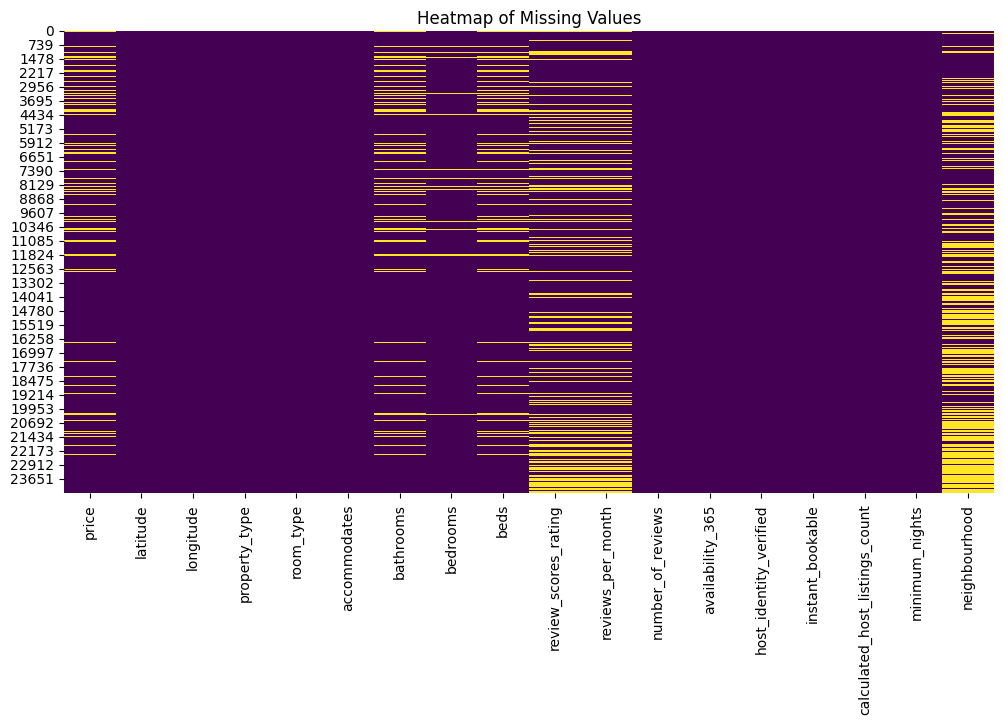

In [42]:
plt.figure(figsize=(12, 6))
sns.heatmap(df.isnull(), cbar=False, cmap="viridis")
plt.title("Heatmap of Missing Values")
plt.show()

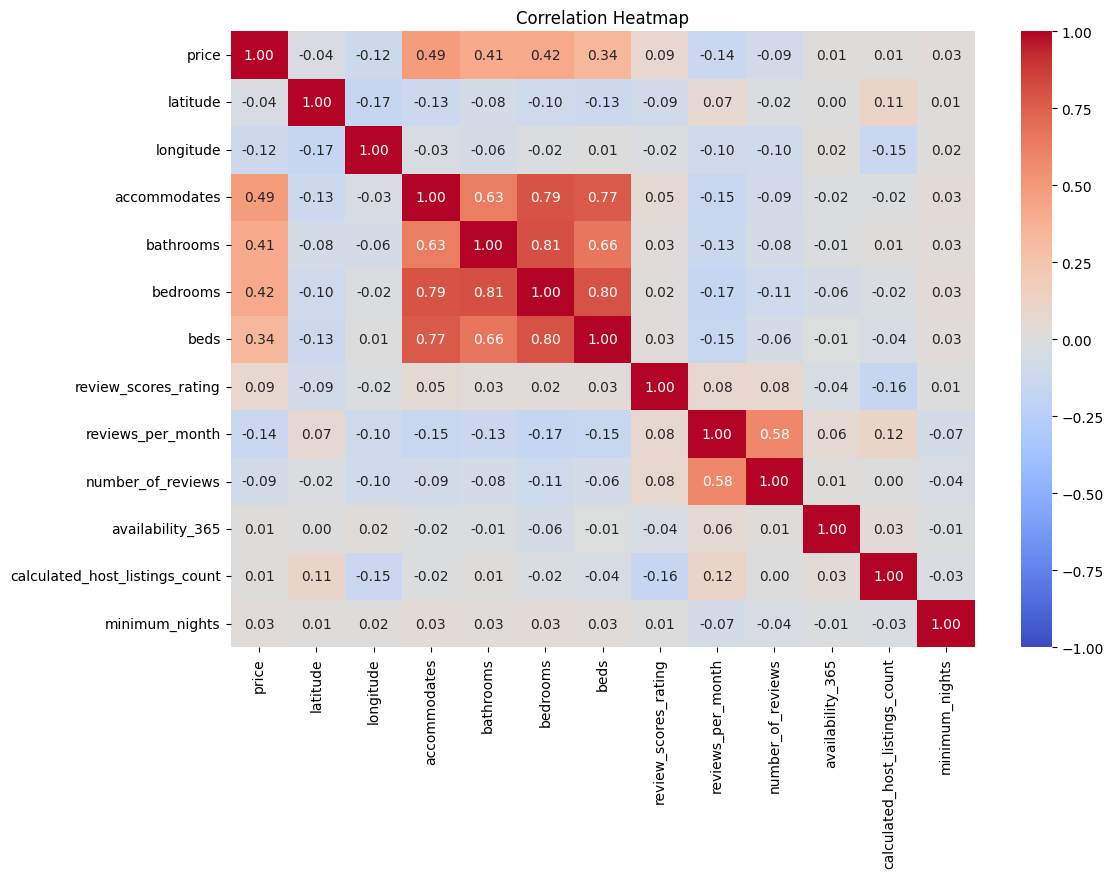

In [43]:
# Check correlation of variable for numerical value
correlation_matrix = df.select_dtypes(['number']).corr(method='pearson')
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Correlation Heatmap")
plt.show()

In [44]:
df.price.describe()
# Mean > Mean : right-skewed distribution.

count    2.081500e+04
mean     2.941997e+05
std      6.364515e+05
min      1.440000e+04
25%      8.800000e+04
50%      1.400000e+05
75%      2.756000e+05
max      2.300000e+07
Name: price, dtype: float64

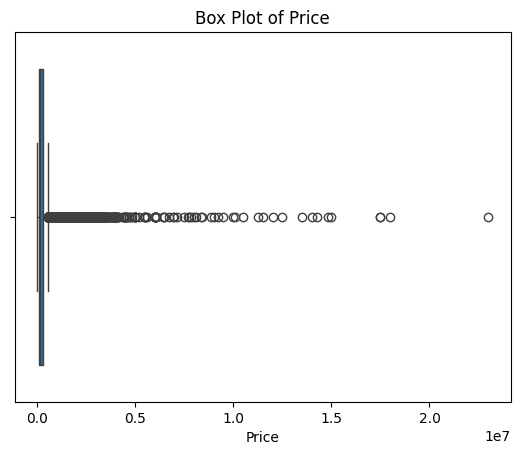

In [45]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your data is in a pandas DataFrame, e.g., df['price']
sns.boxplot(x=df['price'])

# Title and labels
plt.title('Box Plot of Price')
plt.xlabel('Price')

# Show the plot
plt.show()


In [46]:
df.price.isnull().sum()

3571

In [47]:
df.price.shape

(24386,)

In [48]:
df['price'] = df['price'].fillna(df['price'].median())
# since the price is right skewed, its better to fill null values with median.

In [49]:
df.columns

Index(['price', 'latitude', 'longitude', 'property_type', 'room_type',
       'accommodates', 'bathrooms', 'bedrooms', 'beds', 'review_scores_rating',
       'reviews_per_month', 'number_of_reviews', 'availability_365',
       'host_identity_verified', 'instant_bookable',
       'calculated_host_listings_count', 'minimum_nights', 'neighbourhood'],
      dtype='object')

In [50]:
df[['review_scores_rating',
       'reviews_per_month', 'number_of_reviews']].describe()

,review_scores_rating,reviews_per_month,number_of_reviews
count,18625.000000,18625.000000,24386.000000
mean,4.752758,0.862758,23.476257
std,0.416801,1.042617,45.952351
min,1.000000,0.010000,0.000000
25%,4.680000,0.170000,1.000000
50%,4.880000,0.510000,6.000000
75%,5.000000,1.150000,25.000000
max,5.000000,18.380000,772.000000


In [51]:
df.reviews_per_month.isnull().sum()

5761

<Axes: >

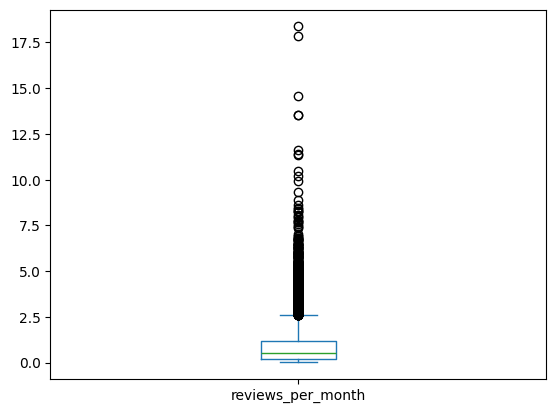

In [52]:
x=df.reviews_per_month
x.plot(kind='box')

In [53]:
df.loc[df['reviews_per_month'].isnull(), 'reviews_per_month'] = df['reviews_per_month'].median()

In [54]:
df.host_identity_verified.isnull().value_counts()

host_identity_verified
False    24386
Name: count, dtype: int64

In [55]:
df.neighbourhood.isnull().sum()

10656

In [56]:
pip install geopy

Note: you may need to restart the kernel to use updated packages.


In [57]:
# Let's define a function to accept coordinates
from geopy.geocoders import Nominatim
from geopy.exc import GeopyError

# Initialize the geolocator
geolocator = Nominatim(user_agent="myGeocoder")

In [58]:
# function to impute the location of road = neighbourhood
def loc_from_coord(lat, long):
    location = geolocator.reverse(str(lat)+","+str(long))
    return location.raw['address'].get('road', '')

In [59]:
# # Let's test the function with the neighbourhood that is null but have lat and long
temp = df.loc[df.neighbourhood.isnull()].copy()
print(loc_from_coord(temp.iloc[0].latitude, temp.iloc[0].longitude))

Braemar Road


<Axes: >

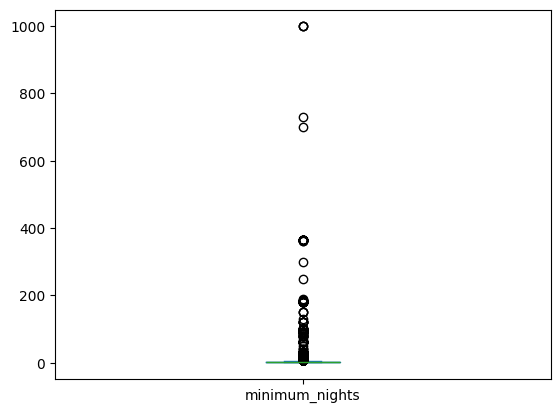

In [60]:
df['minimum_nights'].plot(kind='box')

In [63]:
#Right skew and a lot of misleading value such as negative date and also exit the possible night.
df['minimum_nights'] = df['minimum_nights'].fillna(df['minimum_nights'].median())

In [64]:
df['minimum_nights'].describe()

count    24386.000000
mean         4.490732
std         19.645219
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max        999.000000
Name: minimum_nights, dtype: float64

In [65]:
import numpy as np
q1 = np.percentile(df['minimum_nights'], 25)
median = np.median(df['minimum_nights'])
q3 = np.percentile(df['minimum_nights'], 75)
IQR = q3 - q1
lower_min_night = q1 - 1.5*IQR
upper_min_night = q3 + 1.5*IQR

print(lower_min_night,upper_min_night)

-2.0 6.0


In [66]:
df.loc[df['minimum_nights']>upper_min_night,'minimum_nights'].value_counts().sort_values(ascending=False).head(10)

minimum_nights
7     1276
10     487
14     381
30     176
28      95
8       63
90      55
21      50
12      43
20      40
Name: count, dtype: int64

The value of date must not be negative => using the number of night maybe from 0 up to most having night ( i would take the upper_min_night but there look like on 30 days, there were about 10% of dataset, I will clip it to 30)

In [68]:
# Let's clip the data between 0 and 30
df['minimum_nights'].clip(lower=0, upper=30, inplace=True)

C:\Users\User\AppData\Local\Temp\ipykernel_4288\849605251.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['minimum_nights'].clip(lower=0, upper=30, inplace=True)


<Axes: >

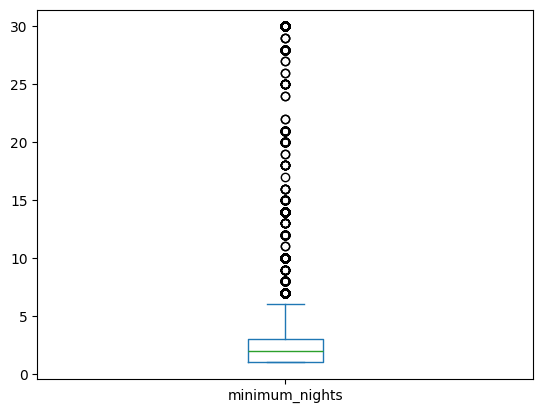

In [69]:
# raw_df['minimum_nights'].describe()
df['minimum_nights'].plot(kind='box')

In [70]:
# raw_df['number_of_reviews'].value_counts()
df['number_of_reviews'].isnull().value_counts()

number_of_reviews
False    24386
Name: count, dtype: int64

In [71]:
df.isnull().sum()

price                                 0
latitude                              0
longitude                             0
property_type                         0
room_type                             0
accommodates                          0
bathrooms                          3578
bedrooms                            601
beds                               3611
review_scores_rating               5761
reviews_per_month                     0
number_of_reviews                     0
availability_365                      0
host_identity_verified                0
instant_bookable                      0
calculated_host_listings_count        0
minimum_nights                        0
neighbourhood                     10656
dtype: int64

In [72]:
df['review_scores_rating'] = df['review_scores_rating'].fillna(df['review_scores_rating'].median())

In [73]:
df['bathrooms'] = df['bathrooms'].fillna(df['bathrooms'].mode())

In [74]:
df['bedrooms'] = df['bedrooms'].fillna(df['bedrooms'].mode())

In [75]:
df['beds'] = df['beds'].fillna(df['beds'].mode())

# 4. Modelling

In [ ]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Split data into features and target
X = data.drop('price', axis=1)
y = data['price']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest model
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared Score: {r2}")
